# 事前準備

In [16]:
!pip install japanize-matplotlib

In [17]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as LR
import japanize_matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
# データを表示する時に列を省略しないためのおまじない
pd.options.display.max_columns = None

%matplotlib inline

# #日本語化matplotlibのインポート & 日本語のフォントを指定
plt.rcParams['font.family'] = 'IPAexGothic'

In [18]:
train = pd.read_csv("./input/train_all.csv")
test = pd.read_csv("./input/test_all.csv")

# 投稿用のサンプルファイルの読み込み
sample = pd.read_csv("./input/sample_submit.csv", header=None)

# 前処理

In [19]:
drop_list = [
    "tv",
    "referee",
    "time",
    "home",
    "away",
    "home_01", "home_02", "home_03", "home_04", "home_05", "home_06", "home_07", "home_08", "home_09", "home_10", "home_11",
    "away_01", "away_02", "away_03", "away_04", "away_05", "away_06", "away_07", "away_08", "away_09", "away_10", "away_11",
    "address",
    "humidity",
]
train = train.drop(drop_list, axis=1)
train = train.sort_values('y', ascending=False)
train["capa_rate"] = train.apply(lambda x: x["y"] / x["capa"], axis=1) # 収容率の追加
train.head(5)

,id,y,year,stage,match,gameday,stadium,home_score,away_score,weather,temperature,home_team,away_team,capa,capa_rate
1059,15127,62632,2013,Ｊ１,第３３節第１日,11/30(土),日産スタジアム,0,2,晴,12.7,横浜Ｆ・マリノス,アルビレックス新潟,72327,0.865956
1066,15134,54905,2013,Ｊ１,第３４節第１日,12/07(土),埼玉スタジアム２００２,2,5,晴,12.6,浦和レッズ,セレッソ大阪,63700,0.861931
1654,15787,54350,2014,Ｊ１,第１４節第１日,05/17(土),埼玉スタジアム２００２,1,0,晴,23.6,浦和レッズ,セレッソ大阪,63700,0.853218
784,14852,52293,2013,Ｊ１,第２節第１日,03/09(土),埼玉スタジアム２００２,1,0,晴,21.6,浦和レッズ,名古屋グランパス,63700,0.820926
298,14292,51879,2012,Ｊ１,第３４節第１日,12/01(土),埼玉スタジアム２００２,2,0,晴,5.6,浦和レッズ,名古屋グランパス,63700,0.814427


## 外れ値の除外

In [20]:
train = train[train["id"] != 15127]	# yの値が大きく外れたデータ
train = train[train["id"] != 15699]	# yの値が0のデータ
train = train[train["id"] != 14071]	# 木の中でyの値が外れたデータ
train = train[train["id"] != 14911]	# 金の中でyの値が外れたデータ

## 列の追加・削除

In [21]:
train["capa_rate"] = train.apply(lambda x: x["y"] / x["capa"], axis=1)

In [22]:
train["WEEK"] = train["gameday"].apply(lambda x: x[x.find("(")+1:x.find("(")+2])
datas = pd.get_dummies(train, columns=["WEEK"], drop_first=True)

In [23]:
train["stage"] = train["stage"].apply(lambda x: x[1])

train["match_num"] = train["match"].apply(lambda x: int(re.findall(r'\d+', x)[0]))
train["match_day"] = train["match"].apply(lambda x: int(re.findall(r'\d+', x)[1]))
datas = datas.drop("match", axis=1)

# 可視化部分

ValueError: not enough values to unpack (expected 2, got 0)

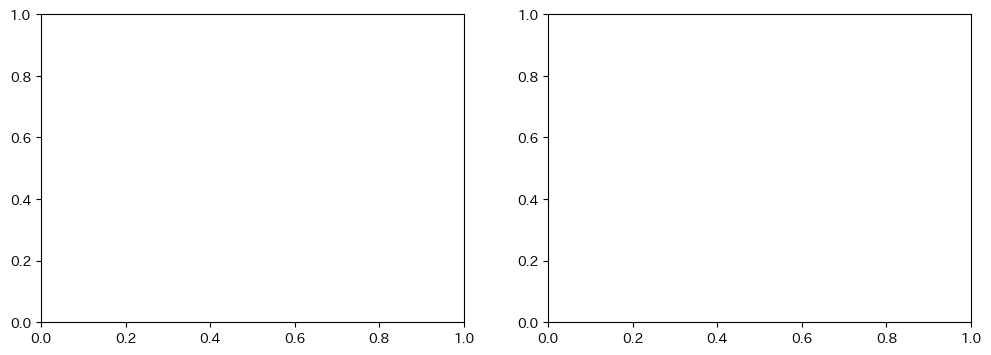

In [25]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
train[train["stage"]=="Ｊ１"][["home_team","y"]].boxplot(by="home_team",rot=90,ax=ax[0])
train[train["stage"]=="Ｊ２"][["home_team","y"]].boxplot(by="home_team",rot=90,ax=ax[1])
ax[0].set_title("J1")
ax[1].set_title("J2")